In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

import seaborn as sns

# Business Understanding - Description of the problem and background

Cameo is a website where people can pay celebrities to record a personalized video that's roughly a minute long. Many celebrities have signed up for Cameo from sports players to reality tv personalities to various cast members from the Office. One of the most challenging things for the celebrities with Cameo (besides keeping their enegry up to record 10 birthday videos back-to-back) figuring out what price to charge of their videos. 



# Data - description of the data and how it will be used to solve the problem

For this project, I will be using scraped data from two sources:

1. Cameo.com -- The website where you can purchase videos from celebrities 
2. FameFlux.com -- A website that ranks celebrities and companies by their online popularity

The Cameo data was scrapped from Janurary 21st 2021 and contains the information below, including the name of the celebrity, the cameo video price and the star rating for the celebrities. 

Fame Flux includes all the data below that begins with FF including the full name of the celebrity, the celebrity's celebrity rating. It was also gathered on Janurary 21st 2021. 

Link to article where I found the source: https://www.netcredit.com/blog/cost-effective-celebs-on-cameo/

I'll use this data to figure out how Fame Flux data (the independent variables) can be used to determing the price of cameos (dependent variable)

In [3]:
cameo = pd.read_csv('cameodata.csv')
cameo = cameo.rename(columns={"Wikipedia Traffic\n(Avg. daily)": "Wikipedia"})
cameo.head()

,Full name,Category,Link,Profile keywords,Full bio,Star rating,Number of reviews,Cameo video price,Cameo chat price,Response times (hours),Tags,FF Full name,FF Profile keywords,FF Celebrity rating,FF Main category rating,Wikipedia,Cost Effectiveness METRIC,Cost Effectiveness RANK
0,Marla Maples,Actors,https://www.cameo.com/marla,Actress,For endorsement & speaking inquiries: tom@lond...,4.98,83,72.0,9.99,76.43,"#Actors, #More, #Motivational Speakers, #Music...",Marla Maples,Actor,202,90,8608,68.757,1
1,Gina Rodriguez,Public Figures,https://www.cameo.com/ginarodriguez,Reality TV Star,Celebrity Manager on Mama June From Not To Hot...,5.00,1,20.0,2.99,5.09,#Reality TV,Gina Rodriguez,Public Figure,"1,524",177,3526,32.808,2
2,Nancy Kerrigan,Athletes,https://www.cameo.com/nancyk,Former Pro Figure Skater - Olympian - Actress,NaN,5.00,122,50.0,2.99,56.47,"#Athletes, #Olympics, #Winter Sports, #Women i...",Nancy Kerrigan,Figure,948,2,1816,21.097,3
3,LaVar Ball,Public Figures,https://www.cameo.com/lavarball,CEO of Big Baller Brand,NaN,4.95,176,133.0,2.99,1.01,"#Athletes, #Basketball, #Entrepreneurs, #Featu...",LaVar Ball,Public Figure,369,27,1558,20.376,4
4,Ice Cube,Actors,https://www.cameo.com/donmega69,Rapper,NaN,4.94,96,500.0,2.99,157.43,"#Actors, #Comedy, #Featured, #Hip Hop, #Movies...",Ice Cube,Actor,101,43,6460,19.802,5


## Dependent Variable Cost per Cameo - This is how much a customer must pay for the cameo

In [4]:
# pulling in the dependent variable and full name so there's a reference point 
dependent=cameo[['Full name', 'Cameo chat price']] 
dependent

,Full name,Cameo chat price
0,Marla Maples,9.99
1,Gina Rodriguez,2.99
2,Nancy Kerrigan,2.99
3,LaVar Ball,2.99
4,Ice Cube,2.99
...,...,...
5992,Emeke Egbule,2.99
5993,Sean Klitzner,19.99
5994,Kinsey Schofield,2.99
5995,Liz Katz,2.99


### Description of the dependent variables 

Cameo chat price - is the price a customer has to pay for the ~1minute video from the celebrity as described by the 'Full name' column

## Independent Variable - Fame Flux data -- these are the fields that will be used to determine the price per Cameo

In [5]:
### showing it with the name of the person so we can see how it's variable by the person. 
independent =cameo[['FF Full name', 'FF Celebrity rating', 'FF Main category rating', 'Wikipedia']] 
independent

,FF Full name,FF Celebrity rating,FF Main category rating,Wikipedia
0,Marla Maples,202,90,8608
1,Gina Rodriguez,"1,524",177,3526
2,Nancy Kerrigan,948,2,1816
3,LaVar Ball,369,27,1558
4,Ice Cube,101,43,6460
...,...,...,...,...
5992,Emeke Egbule,910416,79333,19
5993,Sean Klitzner,230115,7349,22
5994,Kinsey Schofield,250578,38900,7
5995,Liz Katz,910416,79333,381


## Independent Variables

- FF Full name - is the full name from the Fame Flux website 
- FF Celebrity rating - is the ranking of the celebrities compared to another. A ranking of 1 would be the most famous of celebrities. The highest number means the highest the less famous the celebrities is. 
- FF Main category rating - is the rating of the celebrity within their category. For example, if the person is a muscian then they might have a general ranking (FF Celebrity ranking) of 202, but a muscian category ranking (FF Main category rating) of 90
- Wikipedia Traffic\n(Avg. daily) - is the daily number of visits that go to the celebrities wikipeida page per a day on average. 

All of these indicate how famous a particular person is to the general population. Each of these numeric values will be used to determine the potential price a celebrity should charge for a cameo. 

## Visualizing the Data

array([[<AxesSubplot:title={'center':'Wikipedia'}>]], dtype=object)

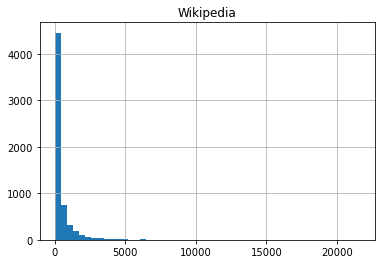

In [6]:
cameo.hist(column='Wikipedia', bins=50)

In [7]:
# converting to int from object
cameo['FF Celebrity rating'].astype(str)


0          202
1        1,524
2          948
3          369
4          101
         ...  
5992    910416
5993    230115
5994    250578
5995    910416
5996    360193
Name: FF Celebrity rating, Length: 5997, dtype: object

In [8]:
### Need to converty the Celebrity rating to a float 
cameo['FF Celebrity rating'] = cameo['FF Celebrity rating'].str.replace(',', '').astype(float)


array([[<AxesSubplot:title={'center':'FF Celebrity rating'}>]],
      dtype=object)

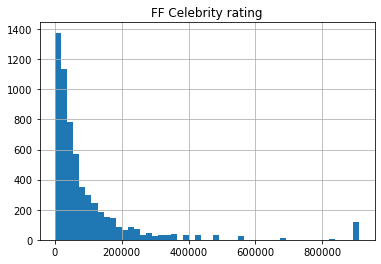

In [9]:
cameo.hist(column='FF Celebrity rating', bins=50)

array([[<AxesSubplot:title={'center':'FF Main category rating'}>]],
      dtype=object)

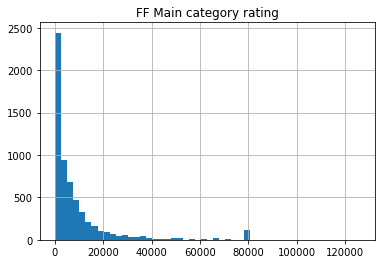

In [10]:
cameo.hist(column='FF Main category rating', bins=50)

array([[<AxesSubplot:title={'center':'Cameo video price'}>]], dtype=object)

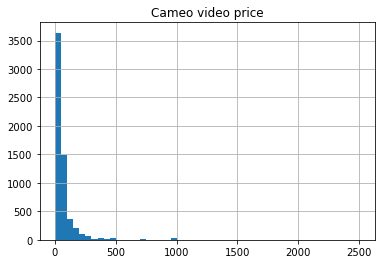

In [11]:
cameo.hist(column='Cameo video price', bins=50)

In [12]:
### Looking for the unique categories 
cameo['Category'].unique()

array(['Actors', 'Public Figures', 'Athletes', 'Musicians',
       'Personalities', 'Models', 'Chefs', 'Comedians', 'Writers',
       'Business People', 'Artists'], dtype=object)

In [13]:
cameo['Category'].value_counts()

Athletes           2044
Public Figures     1412
Actors             1359
Musicians           896
Comedians           103
Personalities        94
Models               50
Chefs                18
Writers              15
Artists               4
Business People       2
Name: Category, dtype: int64

# Methodology 
section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.


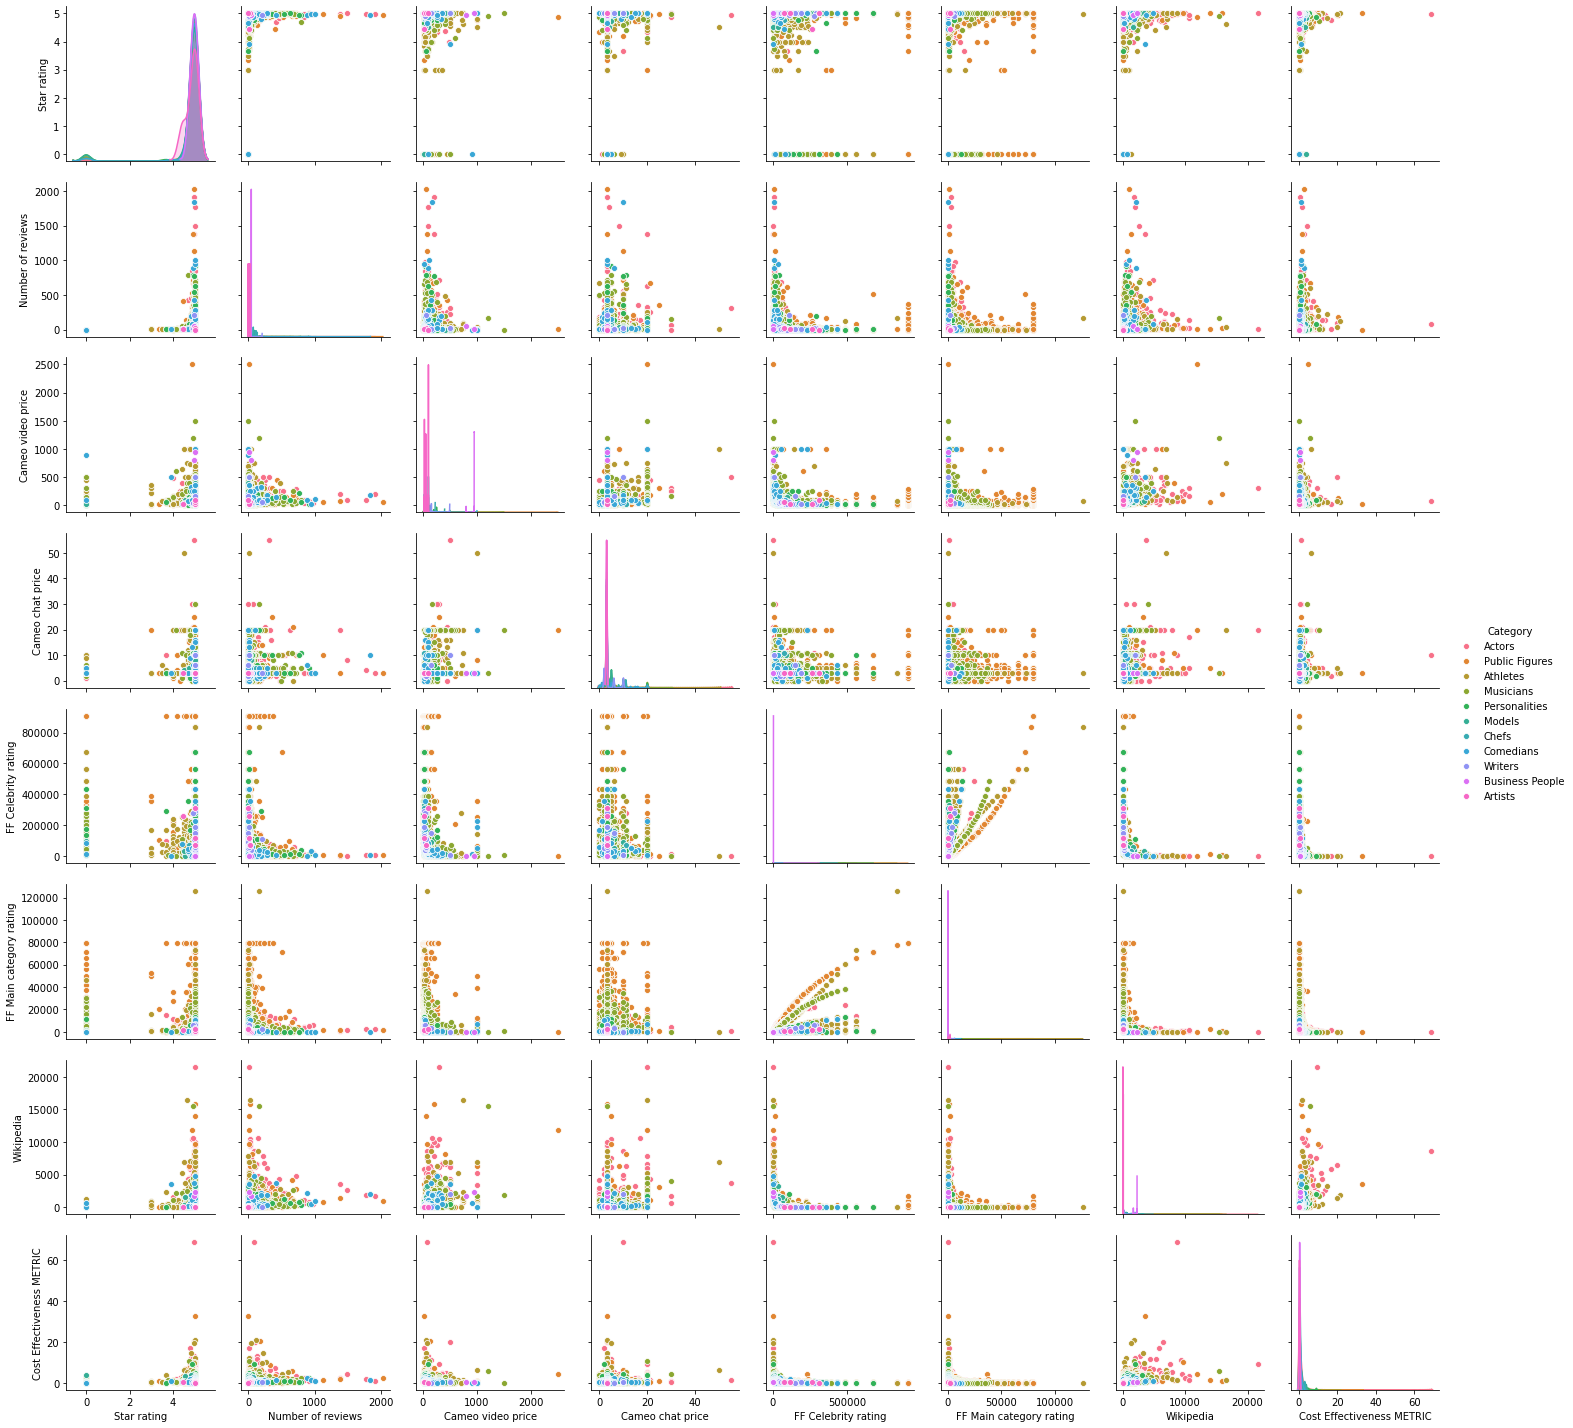

In [14]:
sns.pairplot(cameo,hue='Category', diag_kws={'bw': 0.2})

### One-hot encoding the Category field, so it can be used in the regression

In [15]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
cameo_cat_df = cameo.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in cameo.iterrows():
    for cat in row['Category']:
        cameo_cat_df.at[index, cat] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
cameo_cat_df = cameo_cat_df.fillna(0)
cameo_cat_df.head()

,Full name,Category,Link,Profile keywords,Full bio,Star rating,Number of reviews,Cameo video price,Cameo chat price,Response times (hours),...,M,a,n,d,C,f,m,W,B,p
0,Marla Maples,Actors,https://www.cameo.com/marla,Actress,For endorsement & speaking inquiries: tom@lond...,4.98,83,72.0,9.99,76.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Gina Rodriguez,Public Figures,https://www.cameo.com/ginarodriguez,Reality TV Star,Celebrity Manager on Mama June From Not To Hot...,5.00,1,20.0,2.99,5.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Nancy Kerrigan,Athletes,https://www.cameo.com/nancyk,Former Pro Figure Skater - Olympian - Actress,0,5.00,122,50.0,2.99,56.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LaVar Ball,Public Figures,https://www.cameo.com/lavarball,CEO of Big Baller Brand,0,4.95,176,133.0,2.99,1.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ice Cube,Actors,https://www.cameo.com/donmega69,Rapper,0,4.94,96,500.0,2.99,157.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
### One-hot encoding 
y = pd.get_dummies(cameo.Category, prefix='Catergory')
y.head()

,Catergory_Actors,Catergory_Artists,Catergory_Athletes,Catergory_Business People,Catergory_Chefs,Catergory_Comedians,Catergory_Models,Catergory_Musicians,Catergory_Personalities,Catergory_Public Figures,Catergory_Writers
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0


In [17]:
cameo_w_cat = cameo.join(y)

In [97]:
###Getting the important piece of predicting prices 


cameo_df= cameo_w_cat[['Cameo video price', 'Wikipedia' ,'FF Celebrity rating', 'FF Main category rating', 'Catergory_Actors', 'Catergory_Artists', 'Catergory_Athletes', 'Catergory_Business People', 'Catergory_Chefs', 'Catergory_Comedians', 'Catergory_Models', 'Catergory_Musicians', 'Catergory_Personalities', 'Catergory_Public Figures', 'Catergory_Writers']]

In [98]:
cameo_df

,Cameo video price,Wikipedia,FF Celebrity rating,FF Main category rating,Catergory_Actors,Catergory_Artists,Catergory_Athletes,Catergory_Business People,Catergory_Chefs,Catergory_Comedians,Catergory_Models,Catergory_Musicians,Catergory_Personalities,Catergory_Public Figures,Catergory_Writers
0,72.0,8608,202.0,90,1,0,0,0,0,0,0,0,0,0,0
1,20.0,3526,1524.0,177,0,0,0,0,0,0,0,0,0,1,0
2,50.0,1816,948.0,2,0,0,1,0,0,0,0,0,0,0,0
3,133.0,1558,369.0,27,0,0,0,0,0,0,0,0,0,1,0
4,500.0,6460,101.0,43,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992,250.0,19,910416.0,79333,0,0,0,0,0,0,0,0,0,1,0
5993,999.0,22,230115.0,7349,0,0,0,0,0,1,0,0,0,0,0
5994,1000.0,7,250578.0,38900,0,0,0,0,0,0,0,0,0,1,0
5995,280.0,381,910416.0,79333,0,0,0,0,0,0,0,0,0,1,0


## Looking at correlations 

<AxesSubplot:xlabel='FF Celebrity rating', ylabel='Cameo video price'>

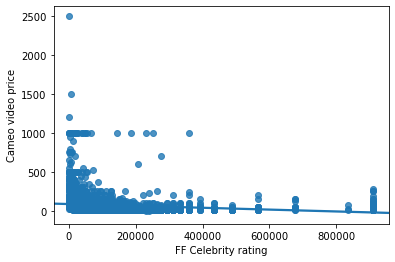

In [99]:
sns.regplot(x="FF Celebrity rating", y="Cameo video price", data=cameo_df)

In [100]:
cameo_df[['FF Main category rating', 'Cameo video price']].corr()

,FF Main category rating,Cameo video price
FF Main category rating,1.000000,-0.139305
Cameo video price,-0.139305,1.000000


<AxesSubplot:xlabel='FF Main category rating', ylabel='Cameo video price'>

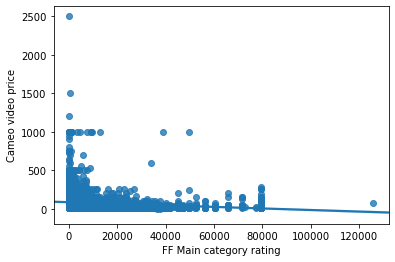

In [101]:
sns.regplot(x="FF Main category rating", y="Cameo video price", data=cameo_df)

In [102]:
cameo_df[['Wikipedia', 'Cameo video price']].corr()

,Wikipedia,Cameo video price
Wikipedia,1.000000,0.405089
Cameo video price,0.405089,1.000000


<AxesSubplot:xlabel='Wikipedia', ylabel='Cameo video price'>

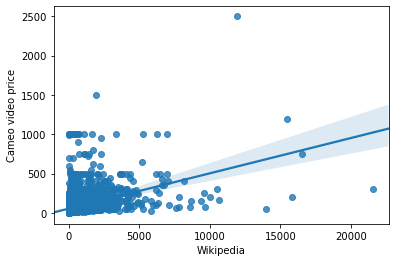

In [103]:
sns.regplot(x="Wikipedia", y="Cameo video price", data=cameo_df)

## Test and Train data sets

In [104]:
#### Getting the variables
msk = np.random.rand(len(cameo_df)) < 0.8
train = cameo_df[msk]
test = cameo_df[~msk]

In [105]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Wikipedia' ,'FF Celebrity rating', 'FF Main category rating']])
y = np.asanyarray(train[['Cameo video price']])

regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 4.43447811e-02 -1.12411339e-04  6.88103729e-04 -8.74185237e+01
  -8.70397222e+01 -6.22465683e+01  6.55228195e+02 -7.79580483e+01
  -1.12813140e+01 -7.87780625e+01 -5.95398623e+01 -6.74388278e+01
  -7.59773084e+01 -4.75499571e+01]]


In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Wikipedia' ,'FF Celebrity rating', 'FF Main category rating']])
train_y = np.asanyarray(train[['Cameo video price']])

test_x = np.asanyarray(test[['Wikipedia' ,'FF Celebrity rating', 'FF Main category rating']])
test_y = np.asanyarray(test[['Cameo video price']])


poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 8.60800000e+03, 2.02000000e+02, ...,
        3.67236000e+06, 1.63620000e+06, 7.29000000e+05],
       [1.00000000e+00, 3.52600000e+03, 1.52400000e+03, ...,
        4.11095952e+08, 4.77453960e+07, 5.54523300e+06],
       [1.00000000e+00, 1.81600000e+03, 9.48000000e+02, ...,
        1.79740800e+06, 3.79200000e+03, 8.00000000e+00],
       ...,
       [1.00000000e+00, 7.00000000e+00, 2.50578000e+05, ...,
        2.44250510e+15, 3.79177135e+14, 5.88638690e+13],
       [1.00000000e+00, 3.81000000e+02, 9.10416000e+05, ...,
        6.57557356e+16, 5.72990784e+15, 4.99300077e+14],
       [1.00000000e+00, 1.50000000e+01, 3.60193000e+05, ...,
        6.45853702e+15, 8.92611549e+14, 1.23364684e+14]])

In [112]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  4.75217035e-02 -6.35125240e-04 -1.00611688e-03
   2.51807322e-06 -4.21658668e-07 -1.00522662e-05  1.74416214e-09
   8.51978615e-10  3.56992412e-08 -1.72121553e-10 -1.12685226e-10
  -1.02633070e-09  2.41713807e-12 -7.79189317e-11  8.03293732e-10
  -1.59050898e-15  3.28365807e-14 -5.35857003e-13  1.93870864e-12]]
Intercept:  [98.9673093]


In [113]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  4.75217035e-02 -6.35125240e-04 -1.00611688e-03
   2.51807322e-06 -4.21658668e-07 -1.00522662e-05  1.74416214e-09
   8.51978615e-10  3.56992412e-08 -1.72121553e-10 -1.12685226e-10
  -1.02633070e-09  2.41713807e-12 -7.79189317e-11  8.03293732e-10
  -1.59050898e-15  3.28365807e-14 -5.35857003e-13  1.93870864e-12]]
Intercept:  [98.9673093]


In [114]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 39.44
Residual sum of squares (MSE): 4273.12
R2-score: 0.18


# Results 
section where you discuss the results.


# Discussion 
section where you discuss any observations you noted and any recommendations you can make based on the results.


# Conclusion 
section where you conclude the report.